# EDA Huida del talento y falta de Personal, en el Sector hosteleropost-COVID
## Caso de Estudio: Madrid

Elaborado por: Jennifer Sánchez-Richart

Expertos hoteleros están presentando una realidad nunca vista, la huida del talento y escases de personal en el área del sector turístico, post-COVID , en dicho estudio se hará referencia específicamente a la Hostelería en la ciudad de Madrid. Problemática que al estar la ocupación de los hoteles muy bajo no se acentúa tanto como lo será en los próximos meses.

Tal como nos comenta Gonzalo Armenteros el CEO de Soho Boutique Hotels, en su entrevista por Hosteltur (8/10/2021) “Hay que trabajar el cliente interno porque sin el no habrá cliente externo”, entendiendo por cliente interno al capital humano del sector de Hostelería. 

Distintas cadenas hoteleras están buscando soluciones para mantener a sus empleados e intentar volver a tener ese capital humano capacitado de vuelta, luego de los ERTEs, o paro (si tenían contratos parciales). Pero la realidad es que ya se han fugado a otros sectores que les ofrece mejor calidad de vida, mejor salario y mejores condiciones.

![imagen](Articulo_fuga_talento.png)

************* * *************

## Contenido del Notebook

### Parte 1: Variables e Hipótesis 
 

### Parte 2: Verificación y modificación de los datos

### Parte 2: Creación de visualizaciones y analisis

************* * *************

## Parte 1: Variables e Hipótesis 

## Variables:
Variable Independiente (causa) : bajo nivel de motivación, horarios del sector hostelero, tiempo libre, conciliación familiar (Esta variable es cualitativa y seria difícil de comprobar).

Variable Dependiente (efecto): El desempleo aumenta en el sector  hotelero y el talento busca alternativas fuera de la industria.

Variable interviniente : Ocupación hotelera, Personal contratado, Tasa de paro, Tasa de ERTEs, Tasa de afectados por COVID. 

## Hipótesis :
El personal contratado en Hostelería ha bajado en relación a la ocupación hotelera y al ADR , la alta tasa de ERTEs no justifican esta bajada, a su vez se han incrementado el personal contratado en otros sectores.

ADR = Tarifa Diaria Promedio /
ERTE = Expediente de Regulación Temporal de Empleo

*********************

## Parte 2: Verificación y modificación de los datos

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
import seaborn as sns
from sklearn import preprocessing
from sklearn.datasets import load_boston, load_iris
plt.style.use('fivethirtyeight')

# Algunas configuraciones de los paquetes
sns.set(color_codes = True)
pd.set_option("display.max_rows", 500)

# para eliminar los warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Datos disponibles
Para confirmar o refutar la hipótesis se buscaron datos en distintas fuentes, como por ejemplo en el Instituto Nacional de Estadísticas (INE),  World Turism Organization,  DATAESTUR.es - Información de la actividad Turística de España, EpDATA.es – Europa Press, Eurostat – European Statistic, Travelgatex, Skyscanner, entre otras. 

## Verificamos informacion disponible

Tal como podemos ver, los datos mayoritariamente estaban en formatos de csv o xlsx, nuestra columna de referencia común para todos: fue la fecha, lo que ayudo a la comparativa de los mismos. Si bien, no se usaron todos los datos, nos sirvió de referencia a la hora de extraer información pertinente.

In [13]:
df_empleados_hosteleria = pd.read_csv('nº_de_personas_empleadas_en_establecimientos_hoteleros_en_madrid.csv',
                encoding = 'latin-1', sep = ";")
df_empleados_hosteleria.head(3)

,ï»¿Year_Q,Num_de_trabajadores
0,2017-3,34353
1,2017-4,34965
2,2018-1,34857


In [12]:
df_empleados_hosteleria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ï»¿Year_Q            17 non-null     object
 1   Num_de_trabajadores  17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


In [14]:
df_alta_laboral = pd.read_excel("Afiliados en alta laboral act. carac. turismo.xlsx", sheet_name ="Empleo turístico según afiliaci")
#df_alta_laboral_q = df_alta_laboral.groupby("Year_Q").sum()
df_alta_laboral.head(3)

,Year,Month,Year_Month,Afiliados_total,Hosteleria,Alojamiento,Agencias,Comidas
0,2001,1,2001-1,1407477,952914,173666,41416,737832
1,2001,2,2001-2,1434053,974590,183577,42143,748870
2,2001,3,2001-3,1480924,1014282,205157,43496,765629


In [16]:
df_alta_laboral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             248 non-null    int64 
 1   Month            248 non-null    int64 
 2   Year_Month       248 non-null    object
 3   Afiliados_total  248 non-null    int64 
 4   Hosteleria       248 non-null    int64 
 5   Alojamiento      248 non-null    int64 
 6   Agencias         248 non-null    int64 
 7   Comidas          248 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 15.6+ KB


In [15]:
df_Occ_ADR =pd.read_excel('Datos_Hoteles_Occ_ADR.xlsx', sheet_name = "Sheet1")
df_Occ_ADR.head(3)

,Year_Q,Emple_estab_hotel_Mad,Occ_Hot_Madrid,ADR_Madrid
0,2017-3,34353,64.09,84.380000
1,2017-4,34965,63.05,89.013333
2,2018-1,34857,59.00,85.616667


In [8]:
df_Occ_ADR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year_Q                 17 non-null     object 
 1   Emple_estab_hotel_Mad  17 non-null     int64  
 2   Occ_Hot_Madrid         17 non-null     float64
 3   ADR_Madrid             17 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 672.0+ bytes


In [9]:
df_Salarios_Sector =pd.read_excel('Salarios_Sector_2017_INE.xlsx', sheet_name = "Salarios")
df_Salarios_Sector.head()

,Actividades,Mujeres,Hombres
0,I Hostelería,13161.3,16138.9
1,Actividades administrativas,13604.1,20174.9
2,"Actividades artísticas, recreativas y de entre...",15526.4,19406.7
3,Comercio al por mayor y al por menor,17377.7,23829.7
4,Actividades inmobiliarias,18488.3,25392.8


In [4]:
df_Salarios_Sector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0    Actividades  14 non-null     object 
 1   Mujeres       14 non-null     float64
 2   Hombres       14 non-null     float64
dtypes: float64(2), object(1)
memory usage: 464.0+ bytes


In [43]:
df_tabla_salarios= pd.read_excel("Salarios_sector_2017_INE.xlsx", sheet_name ="Salarios",index_col = 0)
df_tabla_salarios.head(3)

,Mujeres,Hombres
Actividades,,
I Hostelería,13161.3,16138.9
Actividades administrativas,13604.1,20174.9
"Actividades artísticas, recreativas y de entretenimiento",15526.4,19406.7


In [19]:
df_tabla_general= pd.read_excel("Tabla_general.xlsx", sheet_name ="Tabla_general")
df_tabla_general.head(3)

,Year_Q,Year,Inactivos_convirtieron_parados_esp_miles,Occ_que_no _trab_paro_parcial_miles,Occ_que_no _trab_ERTE_miles,Afect_ERTE_Agricultura_miles,Afect_ERTE_Industria_miles,Afect_ERTE_Construcción_miles,Afect_ERTE_Servicios_miles,Afiliados_alta_Alojamiento,Afiliados_alta_Agencias,Afiliados_alta_Comidas,Emp_tur_Occ_%,Emp_tur_Parados_%,Estab_Abiertos_Mad,Emple_estab_hotel_Mad,Occ_Hot_Madrid,ADR_Madrid
0,2009-1,2009,793.3,40.8,13.9,4.8,21.7,17.1,11.1,690353,174952,2934842,84.749012,15.250988,NaN,NaN,NaN,NaN
1,2009-2,2009,770.5,29.1,19.4,5.3,23.5,9.8,10.1,830442,177317,3031961,86.143091,13.856909,NaN,NaN,NaN,NaN
2,2009-3,2009,817.5,27.2,21.4,2.2,23.2,9.8,13.3,897091,174890,3062413,87.330999,12.669001,NaN,NaN,NaN,NaN


In [18]:
df_tabla_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Year_Q                                    51 non-null     object 
 1   Year                                      51 non-null     int64  
 2   Inactivos_convirtieron_parados_esp_miles  48 non-null     float64
 3   Occ_que_no _trab_paro_parcial_miles       48 non-null     float64
 4   Occ_que_no _trab_ERTE_miles               51 non-null     float64
 5   Afect_ERTE_Agricultura_miles              48 non-null     float64
 6   Afect_ERTE_Industria_miles                48 non-null     float64
 7   Afect_ERTE_Construcción_miles             48 non-null     float64
 8   Afect_ERTE_Servicios_miles                48 non-null     float64
 9   Afiliados_alta_Alojamiento                51 non-null     int64  
 10  Afiliados_alta_Agencias                 

In [20]:
df_tabla_general.isnull().sum()

Year_Q                                       0
Year                                         0
Inactivos_convirtieron_parados_esp_miles     3
Occ_que_no _trab_paro_parcial_miles          3
Occ_que_no _trab_ERTE_miles                  0
Afect_ERTE_Agricultura_miles                 3
Afect_ERTE_Industria_miles                   3
Afect_ERTE_Construcción_miles                3
Afect_ERTE_Servicios_miles                   3
Afiliados_alta_Alojamiento                   0
Afiliados_alta_Agencias                      0
Afiliados_alta_Comidas                       0
Emp_tur_Occ_%                                3
Emp_tur_Parados_%                            3
Estab_Abiertos_Mad                          17
Emple_estab_hotel_Mad                       34
Occ_Hot_Madrid                              34
ADR_Madrid                                  32
dtype: int64

Esto se debe a las fechas disponibles para cada variable. No a valores nulos en si. 

Se realizó una Tabla General, en donde se juntaron cada base de datos en una columna de la misma, organizadas por la fecha, se realizó un proceso de transformación ya que las fechas no se mostraban en el mismo formato en todas, unos en meses y otro es trimestres. Además, se crearon varios data frames partiendo de Tabla General para realizar algunos filtros que facilitaran la graficación de los mismos.

In [23]:
df_hoteles = df_tabla_general[["Year_Q","Year","Emple_estab_hotel_Mad","Occ_que_no _trab_ERTE_miles","Estab_Abiertos_Mad", "Occ_Hot_Madrid"]].iloc[-17:, :]
df_hoteles.head(3)

,Year_Q,Year,Emple_estab_hotel_Mad,Occ_que_no _trab_ERTE_miles,Estab_Abiertos_Mad,Occ_Hot_Madrid
34,2017-3,2017,34353.0,1.3,2235.0,64.09
35,2017-4,2017,34965.0,1.7,2405.0,63.05
36,2018-1,2018,34857.0,1.9,2267.0,59.00


************

## Parte 3: Creacion de Visualizaciones y Analisis

A la hora de graficar se usaron distintas librerías de Python, como Seaborn, Plotly, Matplotly, además de usar Tableu. 

Dependiendo de lo que se quería graficar se decantó por una u otra, según su versatilidad y funcionalidad. 

La dificultad estuvo en descubrir cual era la mejor herramienta para plasmar de la manera mas entendible cada información  

<AxesSubplot:xlabel='Emple_estab_hotel_Mad', ylabel='Density'>

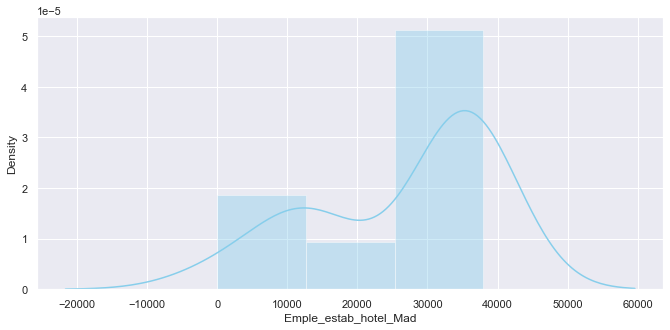

In [24]:
plt.figure(figsize = (10,5))
sns.distplot(df_hoteles["Emple_estab_hotel_Mad"] , color="skyblue", label="Empleados contratados en Hoteles")

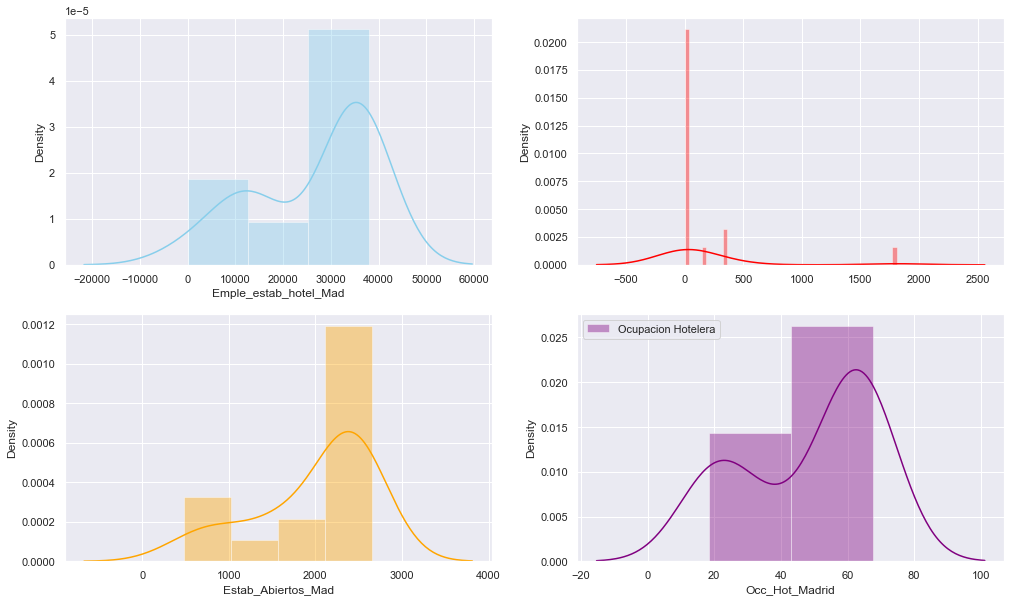

In [25]:
f, axes = plt.subplots(2, 2, figsize=(15,10), sharex=False) 
sns.distplot(df_hoteles["Emple_estab_hotel_Mad"] , color="skyblue", label="Empleados contratados en Hoteles", ax = axes[0,0])

sns.distplot(x = df_hoteles["Occ_que_no _trab_ERTE_miles"] , color="red", label="Empleados en ERTE", ax = axes[0,1])
#plt.plot( 'Year_Q', 'Occ_que_no _trab_ERTE_miles', data=df_hoteles, color='red', ax = axes[0,1])
sns.distplot(df_hoteles["Estab_Abiertos_Mad"] , color="orange", label="Hoteles Abiertos", ax = axes[1,0])

sns.distplot(df_hoteles["Occ_Hot_Madrid"] , color="purple", label="Ocupacion Hotelera", ax = axes[1,1])
plt.legend();

<Figure size 720x360 with 0 Axes>

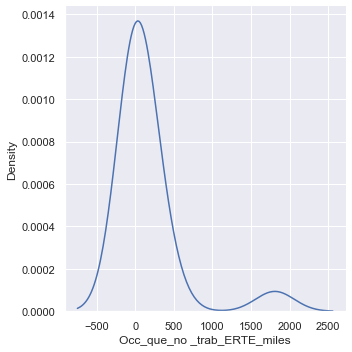

In [27]:
plt.figure(figsize = (10,5))
sns.displot(data=df_hoteles, x="Occ_que_no _trab_ERTE_miles", kind="kde")

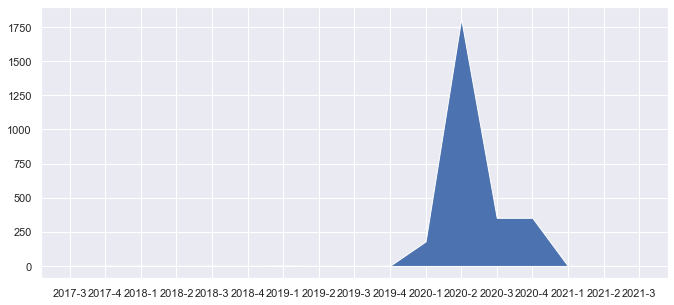

In [28]:
plt.figure(figsize = (10,5))
y=df_hoteles["Occ_que_no _trab_ERTE_miles"]
x=df_hoteles["Year_Q"]

plt.fill_between(x, y)

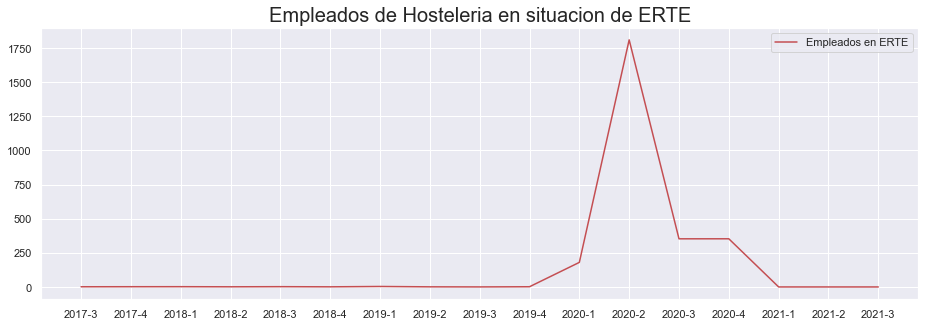

In [33]:
plt.figure(figsize = (14,5))
plt.plot(df_hoteles["Year_Q"], df_hoteles["Occ_que_no _trab_ERTE_miles"], '-r', label = 'Empleados en ERTE')
plt.grid(True)
plt.title("Empleados de Hosteleria en situacion de ERTE", fontsize=20)
plt.legend();

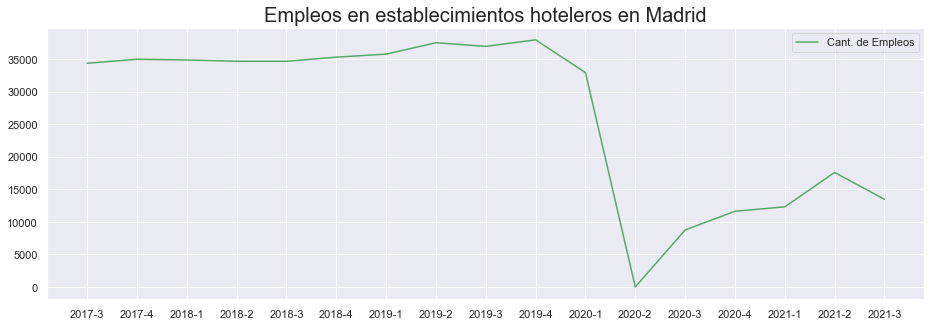

In [31]:
plt.figure(figsize = (14,5))
plt.plot(df_hoteles["Year_Q"], df_hoteles["Emple_estab_hotel_Mad"], '-g', label = 'Cant. de Empleos')
#plt.plot(df_hoteles_y["Year"], df_hoteles_y["Estab_Abiertos_Mad"], ':b', label = 'Estab_Abiertos_Mad')
#plt.axis('equal')
#x = np.linspace(2017-3, 2021-3, 5)
plt.grid(True)
plt.title("Empleos en establecimientos hoteleros en Madrid", fontsize=20)
plt.legend();

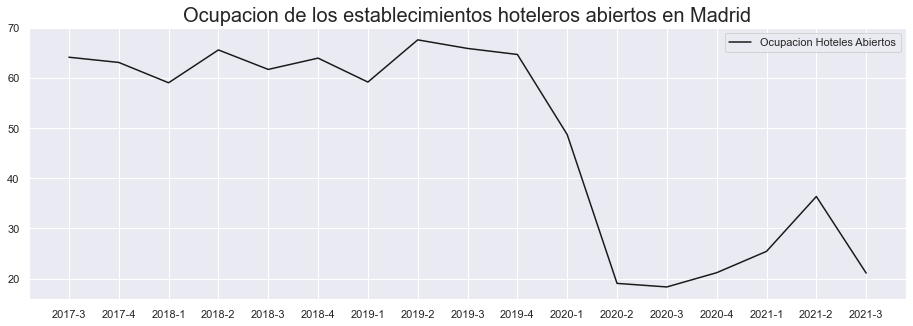

In [32]:
plt.figure(figsize = (14,5))
plt.plot(df_hoteles["Year_Q"], df_hoteles["Occ_Hot_Madrid"], '-k', label = 'Ocupacion Hoteles Abiertos')
plt.grid(True)
plt.title("Ocupacion de los establecimientos hoteleros abiertos en Madrid", fontsize=20)
plt.legend();

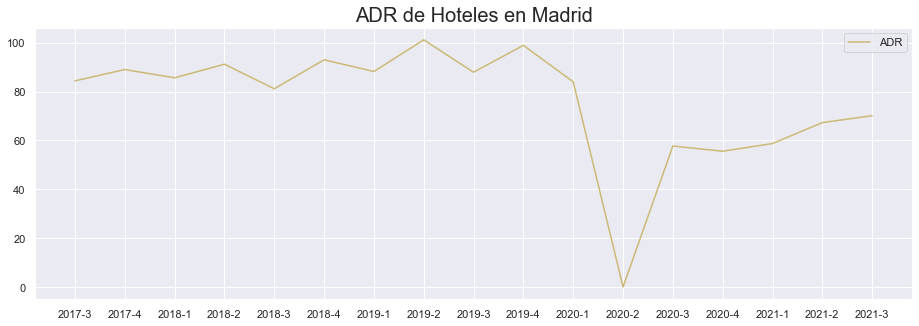

In [35]:
plt.figure(figsize = (14,5))
plt.plot(df_Occ_ADR["Year_Q"], df_Occ_ADR["ADR_Madrid"], '-y', label = 'ADR')
plt.grid(True)
plt.title("ADR de Hoteles en Madrid", fontsize=20)
plt.legend();

In [21]:
# Creating trace1
trace1 = go.Scatter(
                    x = df_alta_laboral["Year_Month"],
                    y = df_alta_laboral['Alojamiento'],
                    name = 'Alojamiento',
                    mode= 'lines', 
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text = df_alta_laboral['Alojamiento'])

# Creating trace2
trace2 = go.Scatter(
                    x = df_alta_laboral["Year_Month"],
                    y = df_alta_laboral['Agencias'],
                    name = 'Agencias',
                    mode= 'lines',
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text = df_alta_laboral['Agencias'])


# Creating trace3
trace3 = go.Scatter(
                    x = df_alta_laboral["Year_Month"],
                    y = df_alta_laboral['Comidas'],
                    name = 'Comidas',
                    mode= 'lines',
                    marker = dict(color = 'rgba(40, 50, 80, 0.8)'),
                    text = df_alta_laboral['Comidas'])

data = [trace1, trace2, trace3]

layout = dict(title = 'Altas laborales según sectores de hostelería ',
             xaxis= dict(title= 'Años',ticklen= 5)
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)

Aca se explica la temporalidad del turismo en Madrid, tanto para Comidas (F&B) y Alojamientos (Hoteles), al no ser una zona de Sol y Playa, el turismo es estacional, y verano suele ser de muy baja afluencia, siendo básicamente solo una ciudad de escala, lo cual se confirma con las altas laborales de la Seguridad Social. 

In [36]:
std_scale = preprocessing.StandardScaler().fit(df_Occ_ADR[['Emple_estab_hotel_Mad', 'ADR_Madrid']])
df_std = std_scale.transform(df_Occ_ADR[['Emple_estab_hotel_Mad', 'ADR_Madrid']])
df_std

array([[ 0.62156012,  0.35291168],
       [ 0.67113436,  0.55069656],
       [ 0.66238596,  0.40570174],
       [ 0.64626623,  0.64403964],
       [ 0.64594222,  0.21474684],
       [ 0.69721754,  0.72073464],
       [ 0.73512725,  0.51626207],
       [ 0.87672164,  1.06949057],
       [ 0.8316026 ,  0.50402502],
       [ 0.91252526,  0.97344396],
       [ 0.50548188,  0.33597901],
       [-2.16115851, -3.24904985],
       [-1.45261952, -0.78598775],
       [-1.219653  , -0.87705417],
       [-1.16481353, -0.74244662],
       [-0.73703322, -0.37661573],
       [-1.07068728, -0.25687762]])

In [37]:
minmax_scale = preprocessing.MinMaxScaler().fit(df_Occ_ADR[['Emple_estab_hotel_Mad', 'ADR_Madrid']])
df_minmax = minmax_scale.transform(df_Occ_ADR[['Emple_estab_hotel_Mad', 'ADR_Madrid']])

In [38]:
df_hoteles_y = df_hoteles.groupby("Year").mean()
df_hoteles_y = df_hoteles_y.reset_index()
df_hoteles_y

,Year,Emple_estab_hotel_Mad,Occ_que_no _trab_ERTE_miles,Estab_Abiertos_Mad,Occ_Hot_Madrid
0,2017,34659.000000,1.500,2320.000000,63.5700
1,2018,34864.000000,1.475,2327.500000,62.5275
2,2019,37037.250000,1.500,2545.250000,64.2925
3,2020,13322.500000,673.450,1343.500000,26.7975
4,2021,14447.666667,0.000,1423.333333,27.6100


In [39]:
std_scale = preprocessing.StandardScaler().fit(df_hoteles_y[["Emple_estab_hotel_Mad","Occ_que_no _trab_ERTE_miles", "Estab_Abiertos_Mad", "Occ_Hot_Madrid"]])
df_std = std_scale.transform(df_hoteles_y[["Emple_estab_hotel_Mad","Occ_que_no _trab_ERTE_miles", "Estab_Abiertos_Mad", "Occ_Hot_Madrid"]])
df_std_1 = pd.DataFrame(df_std)
df_std_1

,0,1,2,3
0,0.732581,-0.498581,0.650938,0.822005
1,0.751852,-0.498674,0.665818,0.763353
2,0.956151,-0.498581,1.097847,0.862654
3,-1.273178,1.999995,-1.286499,-1.246862
4,-1.167406,-0.504159,-1.128104,-1.201150


In [40]:

def plot_1(df_std):
    plt.figure(figsize=(8,6))

    plt.scatter(df_std[:,0], df_std[:,1], 
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red', 
            label='Standardized [$N  (\mu=0, \; \sigma=1)$]', alpha=0.3)

    plt.scatter(df_minmax[:,0], df_minmax[:,1], 
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Ocupacion hotelera vs Cant de empleados contratados')
    plt.xlabel('Emple_estab_hotel_Mad')
    plt.ylabel('ADR_Madrid')
    plt.legend(loc='upper left')
    plt.grid()
    
    plt.tight_layout()
    plt.show()

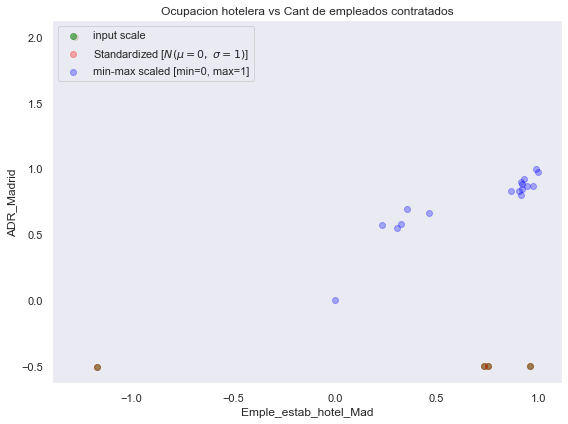

In [41]:
plot_1(df_std)

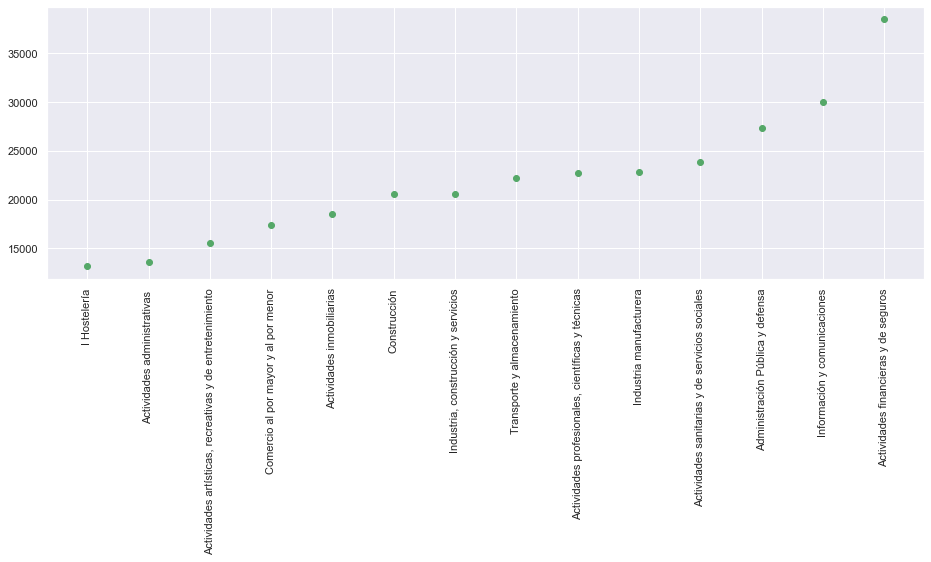

In [50]:
plt.figure(figsize = (14,5))
plt.plot(df_tabla_salarios.index, df_tabla_salarios["Mujeres"], 'og', label = 'Cant. de Empleos')
plt.xticks(rotation=90)
plt.show()

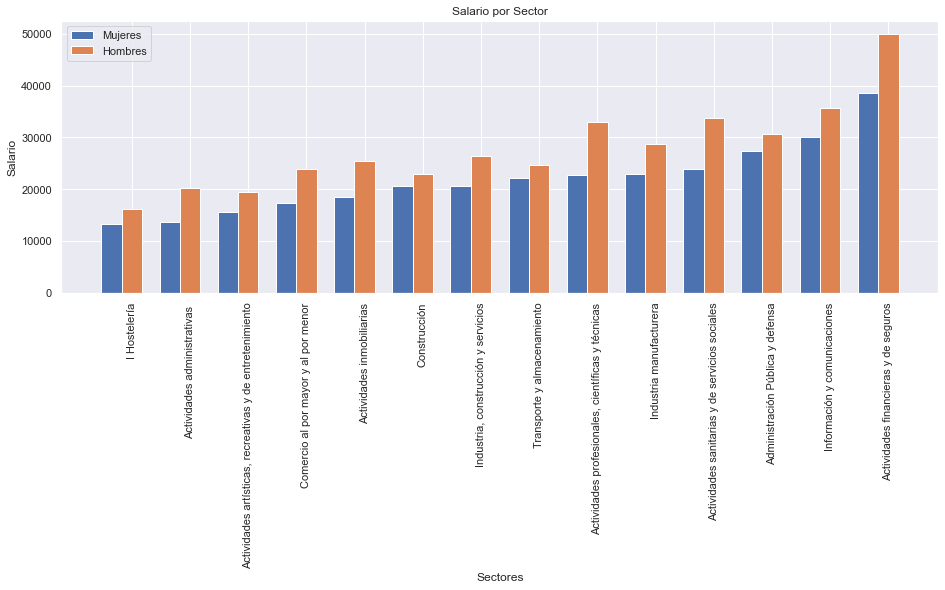

In [44]:
serie_1 = df_tabla_salarios["Mujeres"]
serie_2 = df_tabla_salarios["Hombres"]
 
 
numero_de_grupos = len(serie_1)
indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.35
plt.figure(figsize = (14,5))
plt.bar(indice_barras, serie_1, width=ancho_barras, label='Mujeres')
plt.bar(indice_barras + ancho_barras, serie_2, width=ancho_barras, label='Hombres')
plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras + ancho_barras, df_tabla_salarios.index)
plt.xticks(rotation=90) 
plt.ylabel('Salario')
plt.xlabel('Sectores')
plt.title('Salario por Sector')
 
plt.show()

*************

## Conclusiones

Se ha elegido el tema, ya que luego de 8 años de trabajo en Hoteles de lujo 5 estrellas, se tiene conocimiento del negocio, lo cual facilita la interpretación de los mismos, y la búsqueda de información pertinente y relevante. 

Por tal razón se ha planteado la hipótesis basada en la experiencia de dicho trabajo, al ser una hipótesis empírica basada en la intuición, una vez se compara con los datos, podemos ver la correlación entre las variables y como el COVID a modificado los comportamientos habituales.   

La calidad y veracidad de los datos esta garantizada ya que son extraídos de Entes gubernamentales e internacionales y especialistas en el área de Turismo. En relación a la disponibilidad el problema está que, con la pandemia, muchos de los datos que solían estar disponibles en el primer trimestre del año, aun no han sido publicados, posiblemente por que aun no se han procesado o porque no se pudieron extraer. 
    
Es de acotar que los datos obtenidos se refieren a la Hostelería de Madrid en general y que, si se extrapolaran los valores por tipo de hoteles según estrellas, posiblemente podríamos encontrar cambios, ya que el comportamiento de un Hotel perteneciente a una Cadena Hotelera Internacional , no será igual al pequeño hostelero que le cuesta mantenerse a flote.

Para un próximo estudio se pueden analizar mas variables como: el sexo, y el tipo de hoteles (estrellas), los casos de COVID por países de proveniencia de turista a Madrid, las fechas especificas de cierres de fronteras y restricciones de los mismos, entre otras. Que por cumplimiento de fechas de entrega no han dado tiempo de verificar. 
